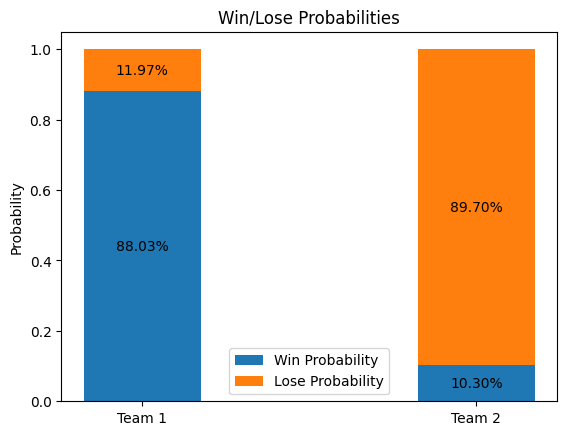

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

df = pd.read_csv('Friskis1_team_data.csv')

#We will first set the complete DataFrames
x_keep_original = ['Gold', 'Level', 'Minions', 'Kills', 'Assists', 'Deaths', 'Towers', 'Dragons', 'Heralds', 'Gold_diff']
X_original = df[x_keep_original]
y_original = df["Win"]

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, figsize=(10,5), params=False):
    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)

    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)

def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, figsize=(2,1), params=False):
    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, figsize=figsize, params=params)

    return model

X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.333333, random_state=42)

#Logistic regression using the original df
log_select = fit_eval(LogisticRegression(max_iter=1000), X_train, y_train, X_test, y_test)

team_1 = {'Gold': 41300,
 'Level': 11.6,
 'Minions': 600,
 'Kills': 29,
 'Assists': 25,
 'Deaths': 26,
 'Towers': 0,
 'Dragons': 0,
 'Heralds': 0,
 'Gold_diff': 4184}

team_2= {'Gold': 37116,
 'Level': 11.6,
 'Minions': 530,
 'Kills': 26,
 'Assists': 26,
 'Deaths': 29,
 'Towers': 0,
 'Dragons': 0,
 'Heralds': 0,
 'Gold_diff': -4184}

# Create DataFrame and select features for team 1
team_1_df = pd.DataFrame(team_1, index=[0])
team_1_features = team_1_df[x_keep_original]

# Make prediction for team 1
team1_prediction = log_select.predict(team_1_features)
team1_prediction_probabilities = log_select.predict_proba(team_1_features)
team1_win_probability = team1_prediction_probabilities[0][1]

# Create DataFrame and select features for team 2
team_2_df = pd.DataFrame(team_2, index=[0])
team_2_features = team_2_df[x_keep_original]

# Make prediction for team 2
team2_prediction = log_select.predict(team_2_features)
team2_prediction_probabilities = log_select.predict_proba(team_2_features)
team2_win_probability = team2_prediction_probabilities[0][1]

# Calculate lose probabilities
team1_lose_probability = 1 - team1_win_probability
team2_lose_probability = 1 - team2_win_probability

# Define labels and data
labels = ["Team 1", "Team 2"]
win_probabilities = [team1_win_probability, team2_win_probability]
lose_probabilities = [team1_lose_probability, team2_lose_probability]

# Create the bar chart
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
ax.bar(x, win_probabilities, width, label="Win Probability")
ax.bar(x, lose_probabilities, width, bottom=win_probabilities, label="Lose Probability")

# Customize the plot
ax.set_ylabel("Probability")
ax.set_title("Win/Lose Probabilities")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add annotations to the plot
for i in range(len(labels)):
    ax.annotate("{:.2%}".format(win_probabilities[i]), xy=(x[i], win_probabilities[i]/2), ha='center', va='center')
    ax.annotate("{:.2%}".format(lose_probabilities[i]), xy=(x[i], win_probabilities[i]+lose_probabilities[i]/2), ha='center', va='center')

# Display the plot
plt.show()